In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from types import SimpleNamespace
import string

import numpy as np


from sketch_hypergraph.language.renderer import render

from sketch_hypergraph.experiments.no_control import NoControlExperiment, primitive_context

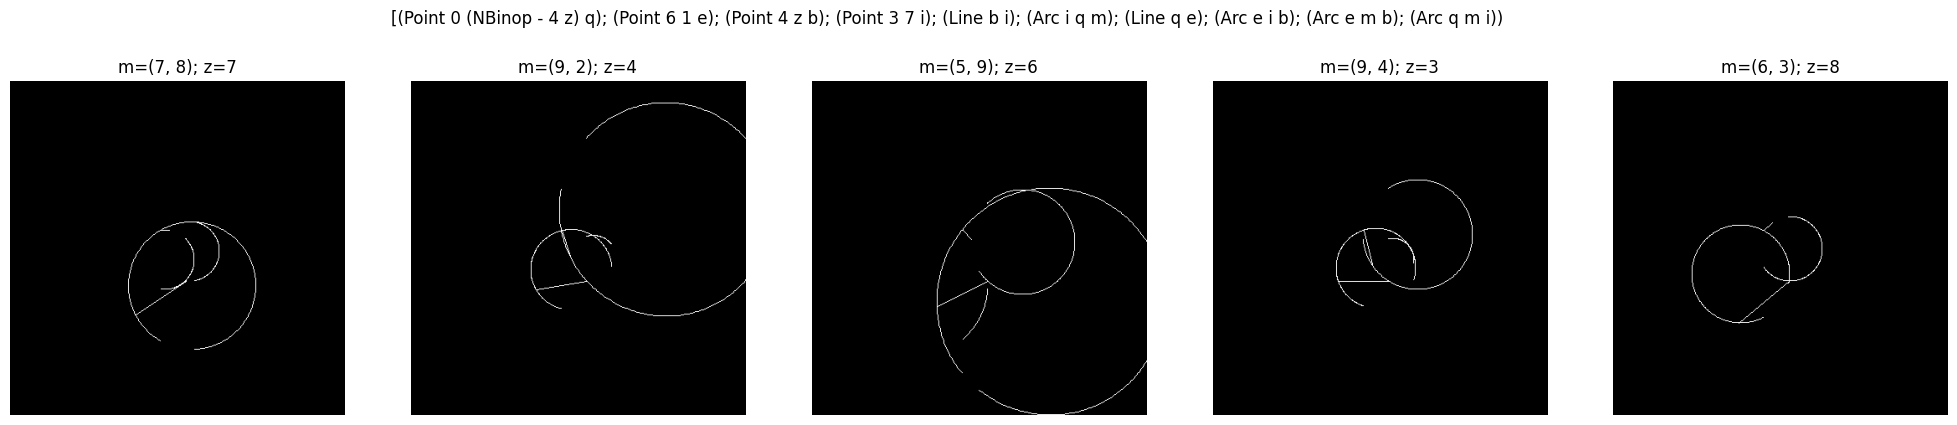

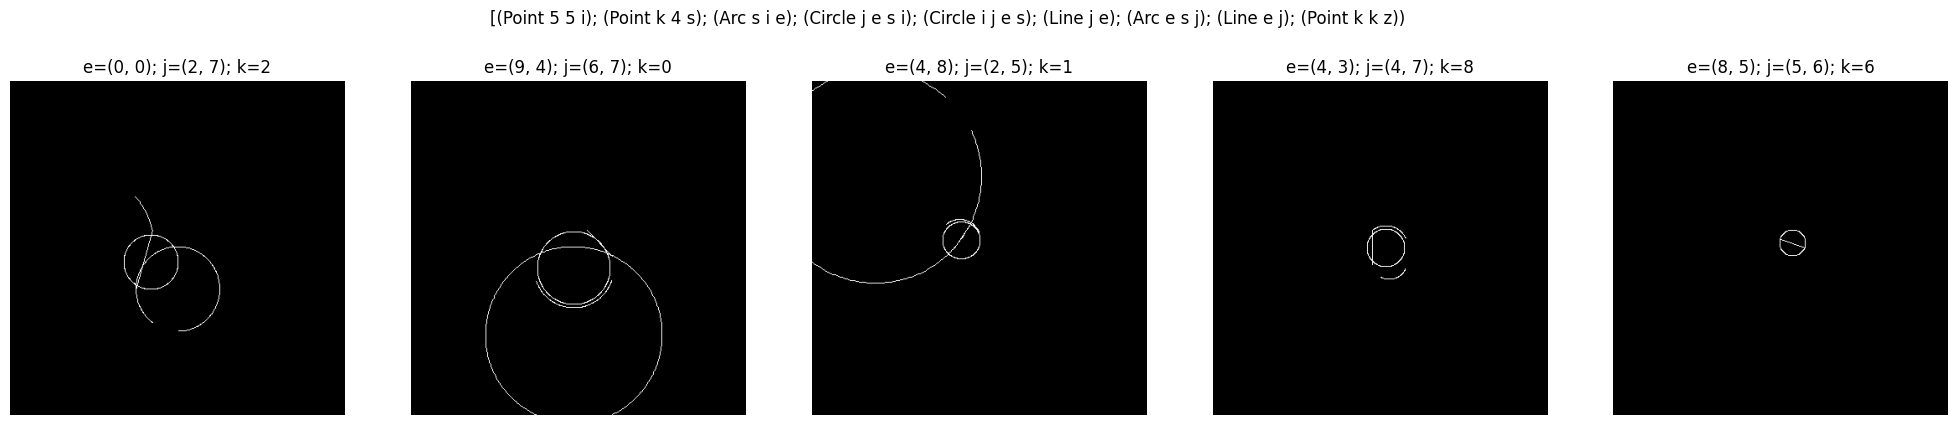

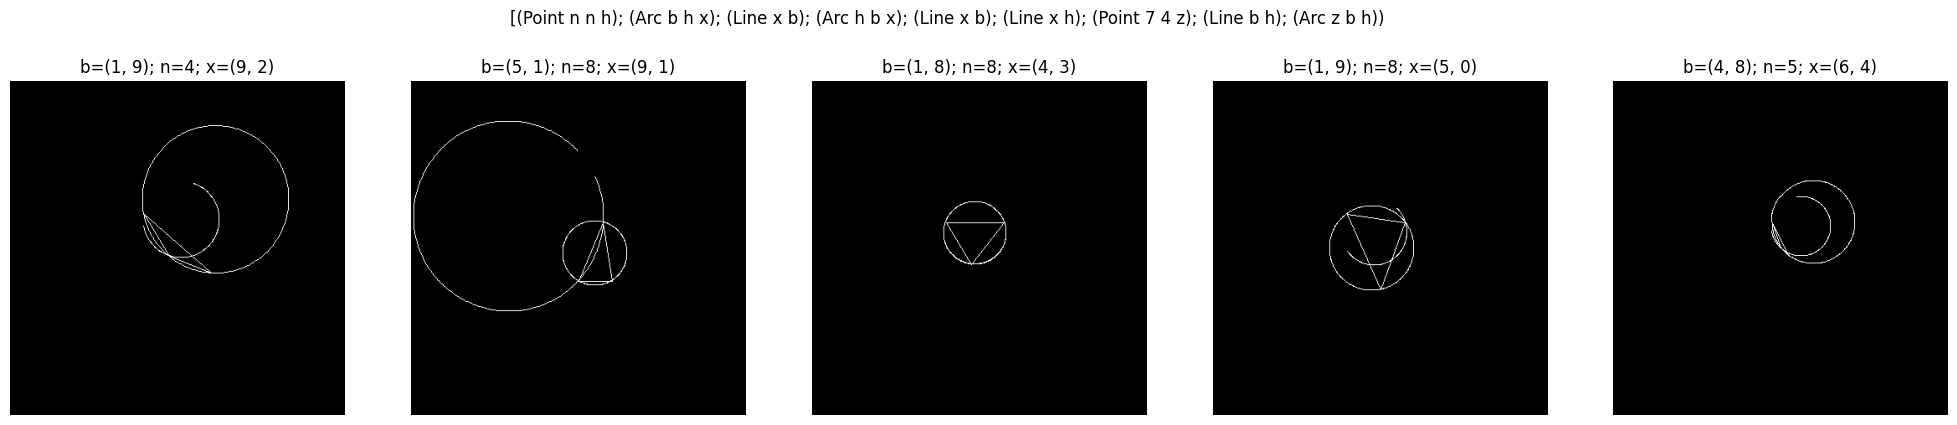

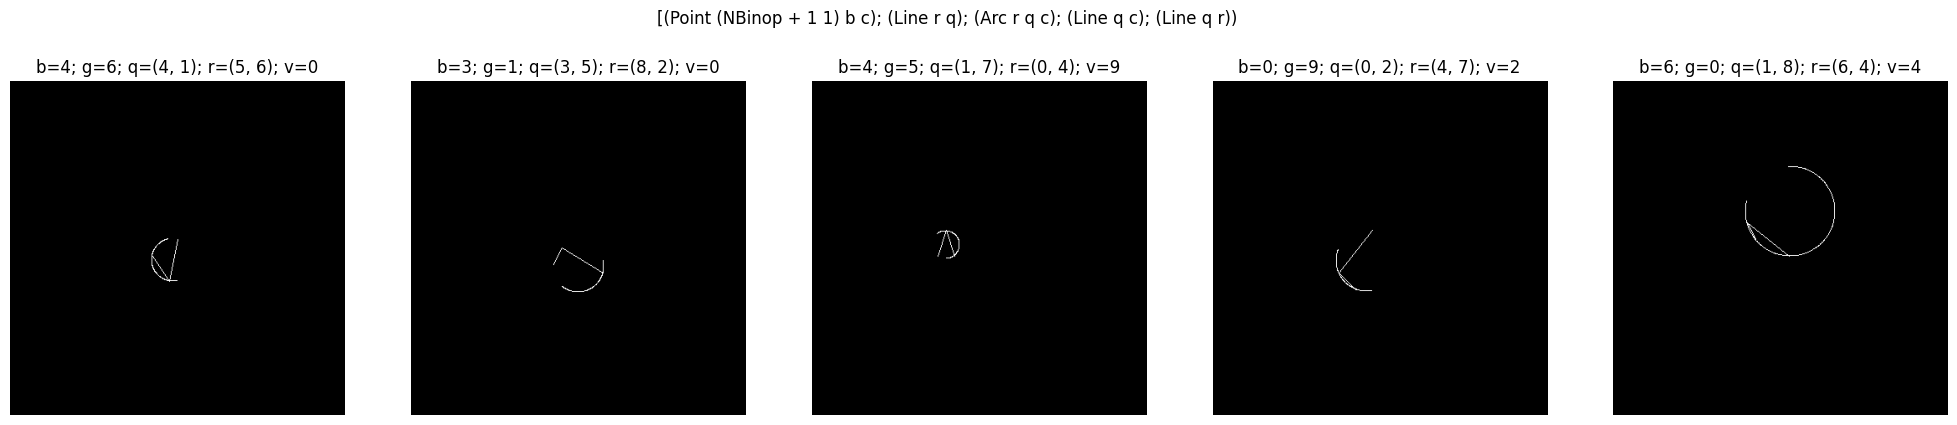

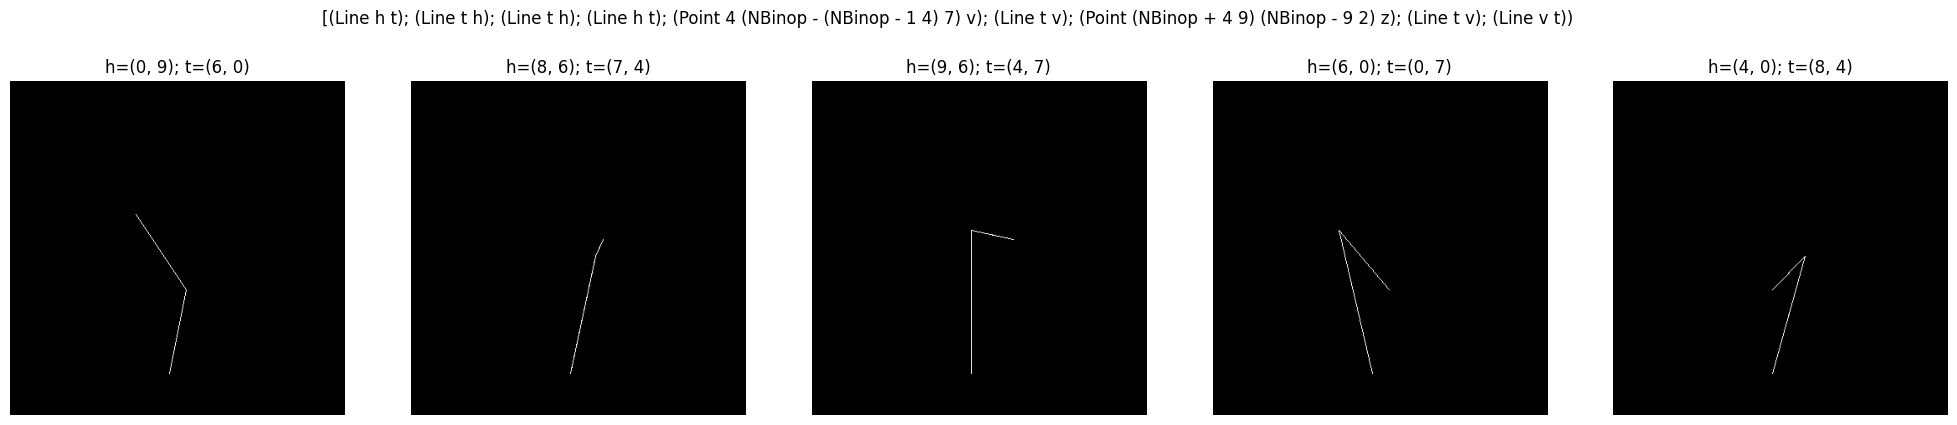

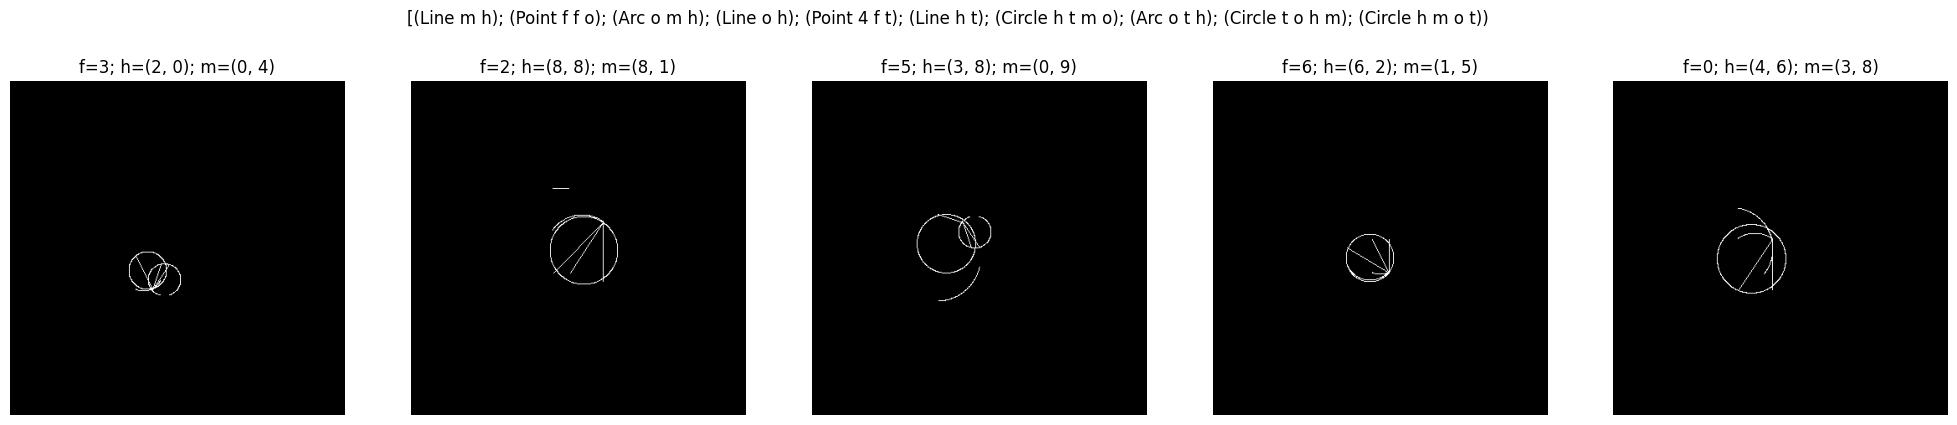

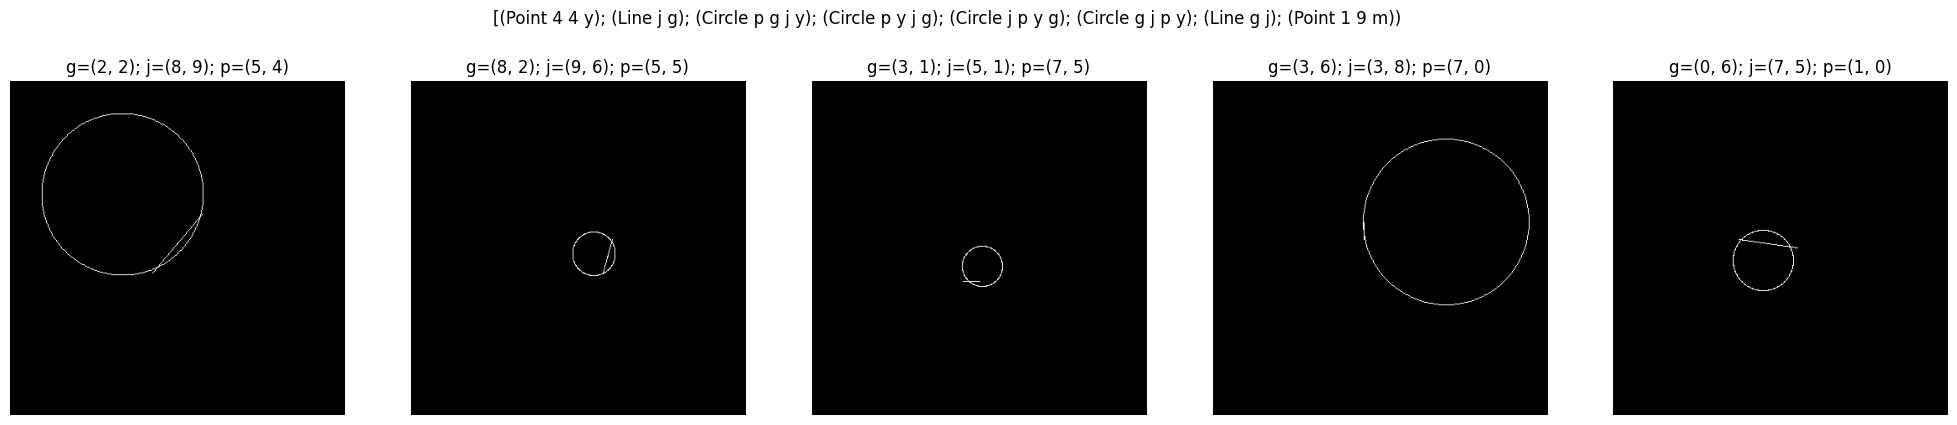

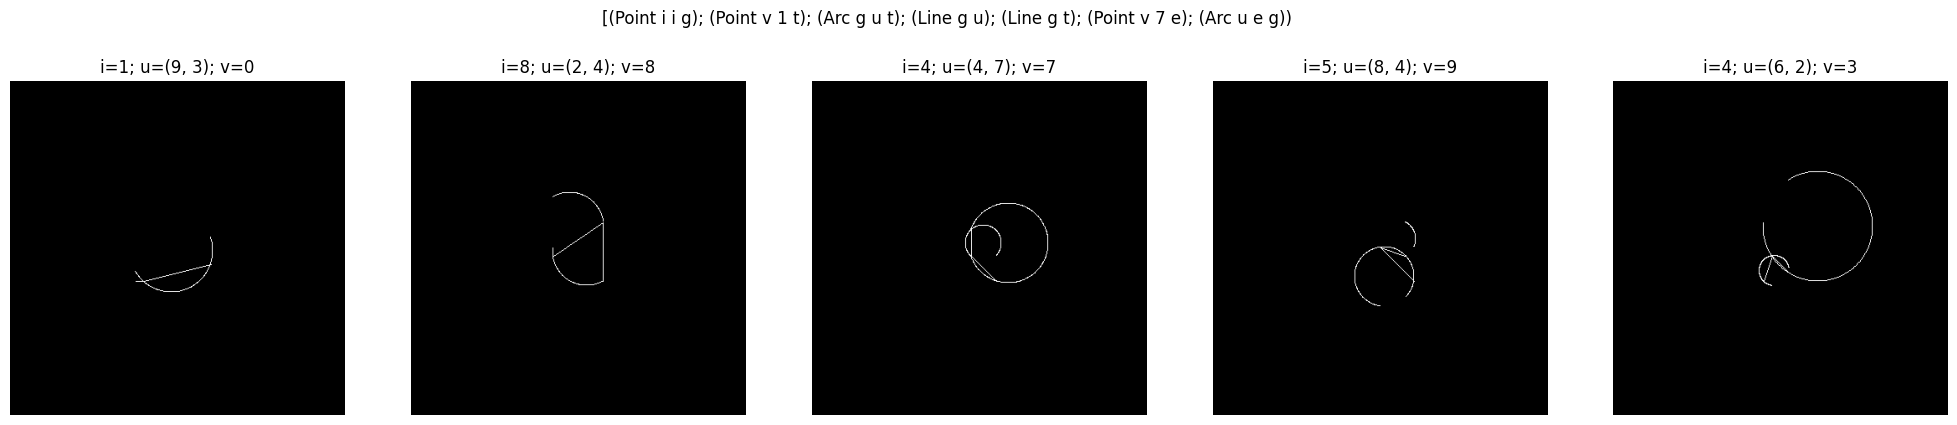

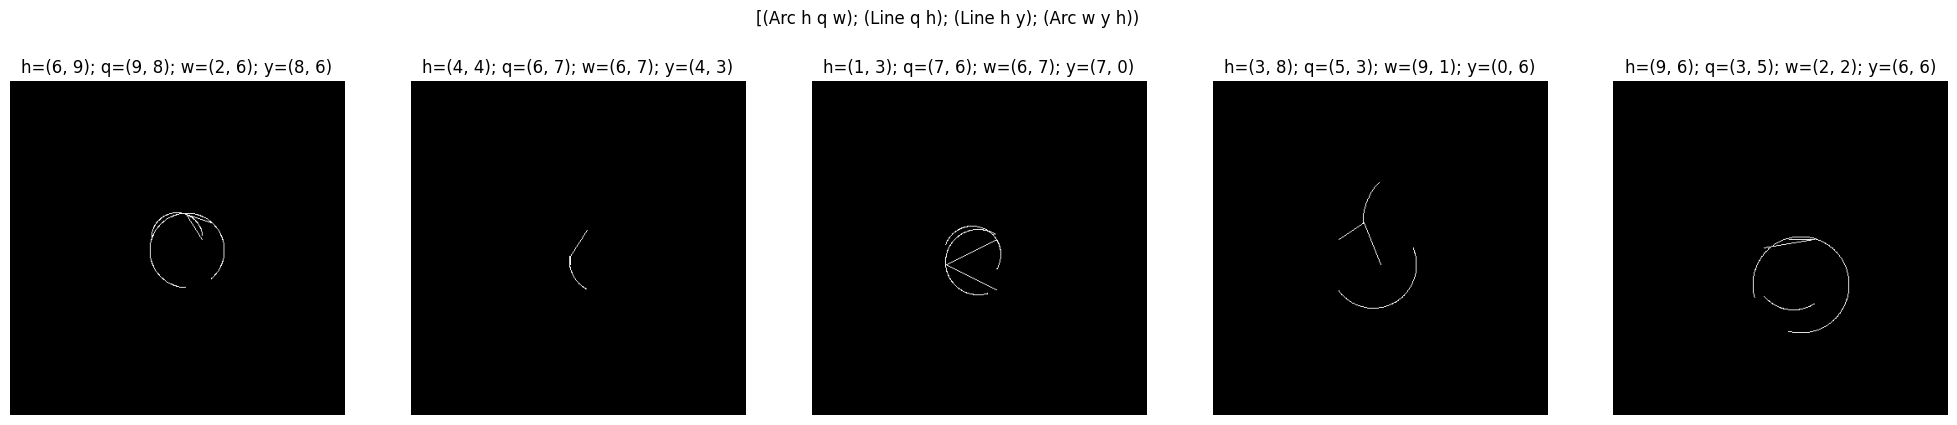

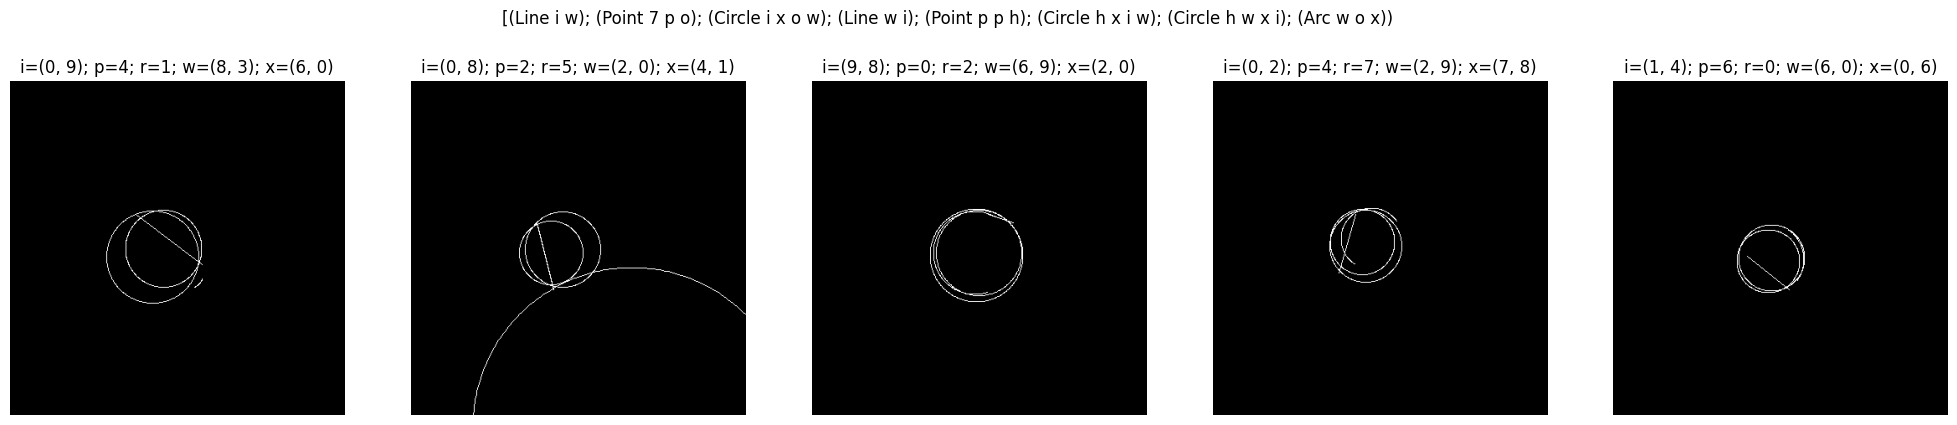

In [4]:
for seed in range(10):
    res = NoControlExperiment().sample(context=primitive_context, seed=seed)
    render(res)